In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
train_data= pd.read_csv("C:/Users/sungj/jspyth/emotion.csv",encoding='CP949')
test_data= pd.read_csv("C:/Users/sungj/jspyth/emotion2-(1).csv",encoding='CP949')
train_data[:5]
train_data.loc[train_data["labe"] == 0,"labe"] = -1 #3개로 하려고 했는데 데이터 수 차이가 너무 많이 나서 중립을 -1로 변경

In [3]:
train_data['title'].nunique(),train_data['labe'].nunique() #100개의 데이터 -1,1로 2개

(100, 2)

In [4]:
test_data['title'].nunique(),train_data['labe'].nunique() #100개의 데이터 -1,1로 2개

(27, 2)

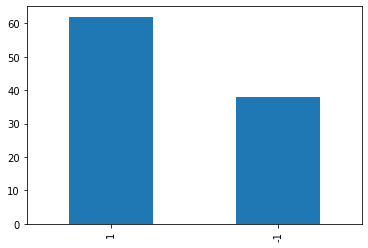

In [5]:
train_data['labe'].value_counts().plot(kind = 'bar')

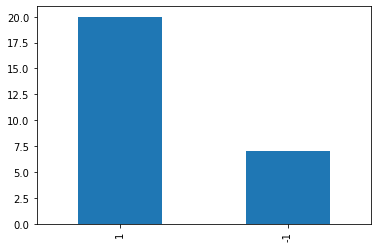

In [6]:
test_data['labe'].value_counts().plot(kind = 'bar')

In [7]:
print(train_data.groupby('labe').size().reset_index(name = 'count')) #갯수확인 정확한

   labe  count
0    -1     38
1     1     62


In [8]:
print(test_data.groupby('labe').size().reset_index(name = 'count')) #갯수확인 정확한

   labe  count
0    -1      7
1     1     20


In [9]:
print(train_data.isnull().values.any()) #na값이 있는지 확인

False


In [10]:
print(test_data.isnull().values.any()) 

False


In [11]:
train_data['title'] = train_data['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #한글과 공백제거
test_data['title'] = test_data['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [12]:
test_data

,Unnamed: 0,title,labe
0,2,시판제품중에선 미쯔랑 가장 비슷한데 씁쓸한 초코맛이 진하진않아요 작은 초코칩이 박혀...,1
1,3,불량식품같은 맛이네요 단단하면서 뚝 부러지는 비스킷같은거일줄알았는데 파사삭 부숴지는...,-1
2,4,초코칩이 제 입엔 젤 맛있어요 사실 초코 맛은 끝에 미미하게 느껴지긴 하지만 고소하...,1
3,5,시나몬 맛을 엄청 좋아하고 모양이 귀엽길래 호기심에 사봤어요 생각보다 시나몬 향이 ...,-1
4,6,아들이 살때 과자를 조금씩 먹기 시작하면서 한참 아이에서 많이 사먹던 거였어요 이제...,-1
5,7,별개가 아깝지않은 상품인거같아여젤리만 시킬생각이었는데 겉포장만 보고 내용물사진이비슷...,1
6,8,초코 좋아하는 딸램 간식 유기농이라 믿고 먹습니다 미국 코슷코에서는 네가지맛 개별포...,1
7,9,기대안하고 산건데 진짜 맛있어요 달짝지근한데 많이 달지않고 초코맛은 별로안나요 꼬독...,1
8,10,바바라 애니멀 쿠키보다 과자 사이즈가 이네요 토끼 사이즈가 작아서 먹기엔 더 편한데...,1
9,11,시나몬 좋아해서 맛있었어요 아기들이 먹는 과자에 시나몬향이 더해진 과자입니다 토끼모...,1


In [13]:
train_data['title'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())#na값 확인

Unnamed: 0    0
title         0
labe          0
dtype: int64


In [14]:
test_data['title'].replace('', np.nan, inplace=True)
print(test_data.isnull().sum())#na값 확인

Unnamed: 0    0
title         0
labe          0
dtype: int64


# 토큰화

In [15]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'] #불용어 정의

In [16]:
okt = Okt()

In [17]:
X_train = []
for sentence in train_data['title']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [18]:
print(X_train[:1]) # 상위 1개만 결과 확인

[['아들', '쵸코', '과자', '급', '땡기다', '주문', '오늘', '배송', '받다', '세', '봉지', '뽁뽁', '안', '넣다', '오다', '워낙', '과자', '얇다', '바삭', '형태', '라서', '부숴', '지다', '오다', '전', '좀더', '브라우니', '같다', '맛', '을', '기대하다', '촉촉하다', '쵸코', '칩', '쿠키', '얇다', '썰다', '바삭', '구', '운맛', '이네', '요', 'ㅋㅋㅋ', '아들', '같이', '구매', '로아커', '제품', '더', '맛있다', '그래서', '맛', '보다', '또', '구매', '싶다', '않다', '그냥', '맛', '을', '보다', '거', '로', '만족하다']]


In [19]:
X_test = []
for sentence in test_data['title']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [20]:
print(X_test[:1]) # 상위 1개만 결과 확인

[['시판', '제품', '중', '에선', '미쯔', '랑', '가장', '비슷하다', '씁쓸하다', '초코', '맛', '진하다', '않다', '작다', '초코', '칩', '박히다', '생각', '보단', '달달', '통밀', '이라', '약간', '끄다', '끄다', '기', '도합', '니', '다', '성분', '좋다']]


# 정수인코딩

In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [22]:
print(tokenizer.word_index)

{'먹다': 1, '맛': 2, '맛있다': 3, '초코': 4, '같다': 5, '과자': 6, '달다': 7, '보다': 8, '너무': 9, '바삭': 10, '요': 11, '브라우니': 12, '않다': 13, '다': 14, '칩': 15, '쿠키': 16, '엄청': 17, '오다': 18, '랑': 19, '좋다': 20, '봉지': 21, '느낌': 22, '있다': 23, '많이': 24, '없다': 25, '더': 26, '진짜': 27, '나': 28, '구매': 29, '생각': 30, '우유': 31, '달': 32, '때': 33, '을': 34, '거': 35, '개': 36, '에서': 37, '되다': 38, '것': 39, '이다': 40, '부서지다': 41, '만': 42, '안': 43, '얇다': 44, '식감': 45, '자다': 46, '사먹다': 47, '제': 48, '저': 49, '좋아하다': 50, '아니다': 51, '그': 52, '달달': 53, '고': 54, '주문': 55, '인데': 56, 'ㅎㅎ': 57, '많다': 58, '들다': 59, '배송': 60, '불다': 61, '게': 62, '사다': 63, '단맛': 64, '세': 65, '전': 66, 'ㅋㅋㅋ': 67, '또': 68, '그냥': 69, '보고': 70, '근데': 71, '지': 72, '서': 73, '부분': 74, '가격': 75, '그래도': 76, '넘다': 77, '같이': 78, '이에요': 79, 'ㅋㅋ': 80, '딱': 81, '나다': 82, 'ㅠ': 83, '바삭바삭하다': 84, '조각': 85, '땡기다': 86, '싶다': 87, '초콜릿': 88, '말리다': 89, '이라': 90, '하': 91, '쿠팡': 92, '네': 93, '수': 94, '두': 95, '한번': 96, '약간': 97, '하고': 98, '설탕': 99, 'ㅠㅠ': 100, '구': 101, '로': 102,

In [23]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 842
등장 빈도가 1번 이하인 희귀 단어의 수: 484
단어 집합에서 희귀 단어의 비율: 57.482185273159146
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 18.250377073906485


In [24]:
# 전체 단어 개수 중 빈도수 1이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 360


In [25]:
X_test = tokenizer.texts_to_sequences(X_test)
X_train = tokenizer.texts_to_sequences(X_train)

In [26]:
y_train = np.array(train_data['labe'])
y_test = np.array(test_data['labe']) #별도지정

In [27]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [28]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

100
100


리뷰의 최대 길이 : 104
리뷰의 평균 길이 : 26.52


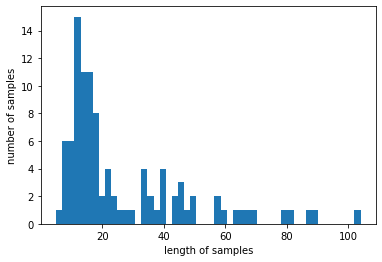

In [29]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [30]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [31]:
max_len = 70
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 70 이하인 샘플의 비율: 95.0


In [60]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [40]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [41]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [68]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100000000)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [72]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=1, callbacks=[es, mc], batch_size=10, validation_split=0.1)

ValueError: in user code:

    C:\Users\sungj\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\sungj\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\sungj\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\sungj\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\sungj\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\sungj\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\sungj\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\sungj\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\sungj\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 10000 but received input with shape [10, 70]
